In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Import the data:

In [2]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

## EDA:

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# No Null Values
df.isnull().sum().max()

0

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


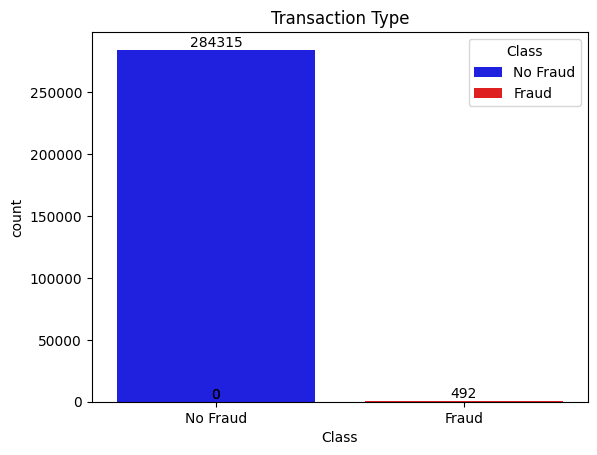

In [10]:
# 1. Create the plot
# We'll handle the legend entirely through the 'ax' object.
ax = sns.countplot(
    x='Class',
    hue='Class',
    data=df,
    palette=['Blue', 'Red']
)

# 2. Use .set() ONLY for ticks, labels, and titles
ax.set(xticks=[0, 1],
       xticklabels=['No Fraud', 'Fraud'],
       title='Transaction Type')

# 3. Handle the legend separately
ax.legend(title='Class', labels=['No Fraud', 'Fraud'])

# 4. Loop for annotations
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom'
    )

plt.show()

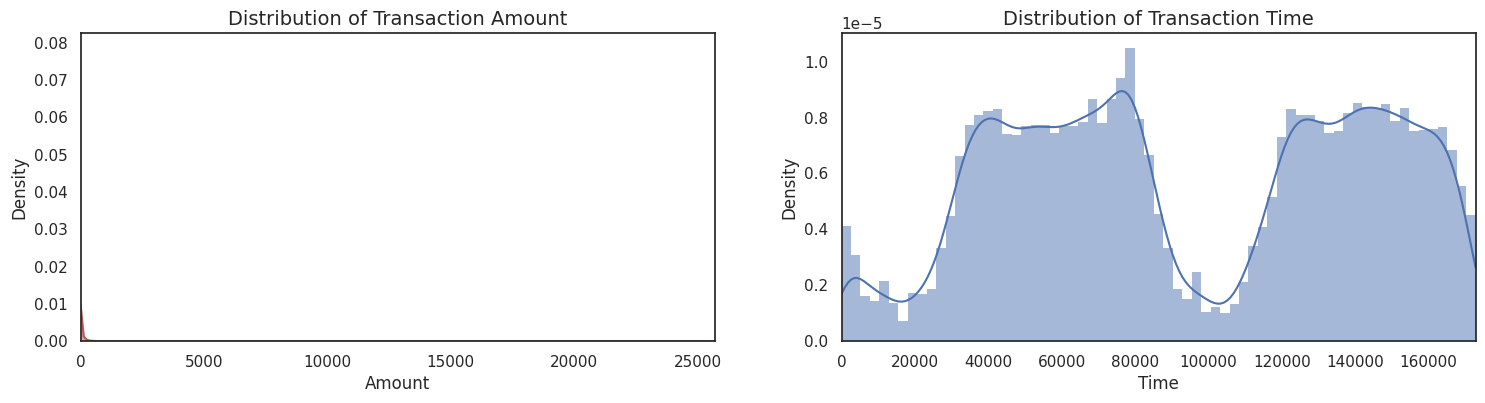

In [11]:
# Set a clean style
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Plot 1: Distribution of Transaction Amount
# Modern Seaborn prefers passing the DataFrame and column name directly
sns.histplot(data=df, x='Amount', ax=ax[0], color='r', kde=True, stat="density", linewidth=0)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([df['Amount'].min(), df['Amount'].max()])

# Plot 2: Distribution of Transaction Time
sns.histplot(data=df, x='Time', ax=ax[1], color='b', kde=True, stat="density", linewidth=0)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([df['Time'].min(), df['Time'].max()])

plt.show()

The distribution plot of transaction amounts is not clearly visible.

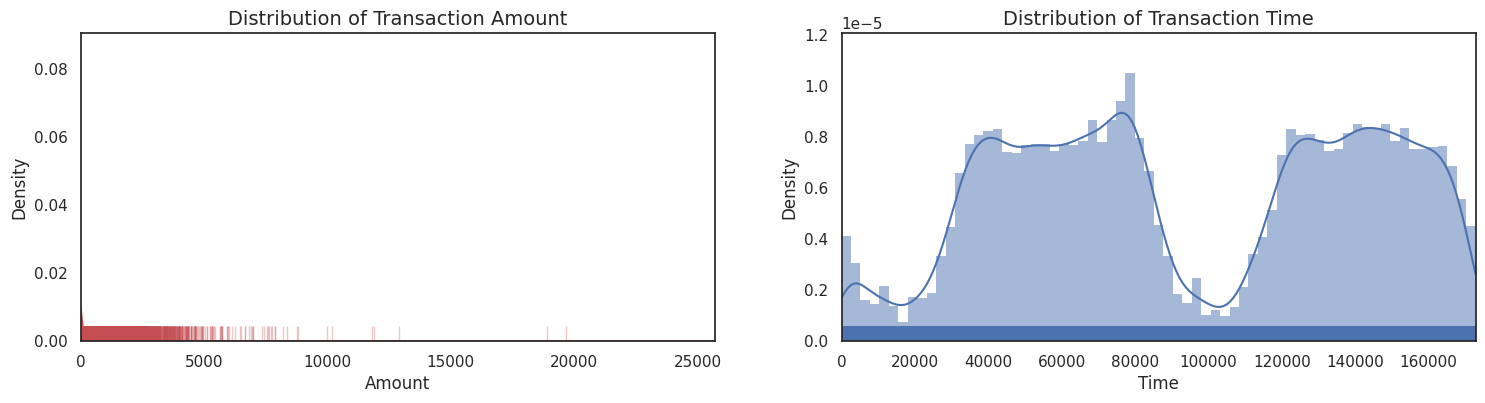

In [12]:
# Rug Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Plot 1: Distribution of Transaction Amount + Rug Plot
sns.histplot(data=df, x='Amount', ax=ax[0], color='r', kde=True, stat="density", linewidth=0)
sns.rugplot(data=df, x='Amount', ax=ax[0], color='r', alpha=0.3, height=0.05) # Add Rug Plot
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([df['Amount'].min(), df['Amount'].max()])

# Plot 2: Distribution of Transaction Time + Rug Plot
sns.histplot(data=df, x='Time', ax=ax[1], color='b', kde=True, stat="density", linewidth=0)
sns.rugplot(data=df, x='Time', ax=ax[1], color='b', alpha=0.3, height=0.05) # Add Rug Plot
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([df['Time'].min(), df['Time'].max()])

plt.show()

A feature is scaled if a transformation such as the following has been applied:

Standardization (mean = 0, std = 1)

Min–Max scaling (range usually [0, 1])

Robust scaling (uses median and IQR)

Normalization (unit norm)

Scaling affects numerical features only, not categorical ones

In [13]:
# There are no categorical features in the dataset
numerical_features = df.columns

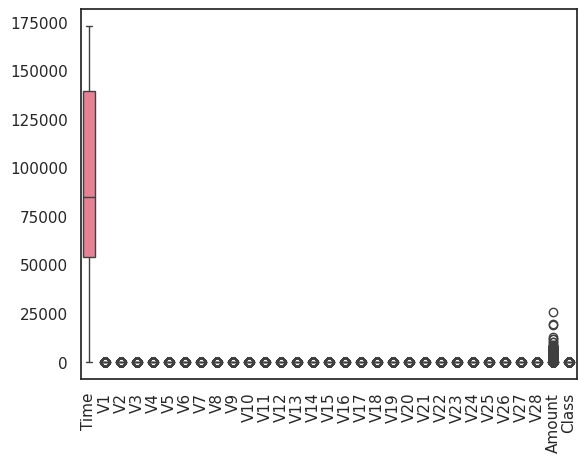

In [14]:
sns.boxplot(data=df[numerical_features])
plt.xticks(rotation=90)
plt.show()

The *Time* and *Amount* columns are not scaled.
The *Class* column is the target variable and has already been encoded by default

Note: Scaling the target column (y) is usually a bad practice — except in a few specific, well-defined cases.

## Feature Scaling:

In [15]:
# When numerical features exhibit skewness or extreme values, median–IQR–based scaling is preferred.
# This is why RobustScaler is the correct and defensible choice here.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(
    df[['Amount', 'Time']]
)

df.drop(columns=['Amount', 'Time'], inplace=True)

RobustScaler is preferred because it scales features using the median and IQR, which are resistant to outliers, preventing extreme transaction values from distorting the feature distribution.

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Split the data:

In [17]:
# The code uses a stratified split to preserve class imbalance in both training and test sets, 
# ensuring statistically consistent evaluation.
from sklearn.model_selection import StratifiedKFold

# Class distribution
class_dist = df['Class'].value_counts(normalize=True) * 100
print(f"No Frauds: {class_dist.get(0, 0):.2f}% of the dataset")
print(f"Frauds: {class_dist.get(1, 0):.2f}% of the dataset")

# Features and target
X = df.drop(columns='Class')
y = df['Class']

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Take ONE split (instead of overwriting in a loop)
train_idx, test_idx = next(skf.split(X, y))

original_Xtrain = X.iloc[train_idx].values
original_Xtest = X.iloc[test_idx].values
original_ytrain = y.iloc[train_idx].values
original_ytest = y.iloc[test_idx].values

# Label distribution check
print('-' * 80)
print('Label Distributions:\n')

print('Train:', np.bincount(original_ytrain) / len(original_ytrain))
print('Test :', np.bincount(original_ytest) / len(original_ytest))

No Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset
--------------------------------------------------------------------------------
Label Distributions:

Train: [0.99827514 0.00172486]
Test : [0.998262 0.001738]


### Under Sampling:

#### Since the classes are highly imbalanced, we apply random undersampling to create a balanced class distribution.

In [18]:
"""
fraud_count = df['Class'].sum()

balanced_df = (
    df.groupby('Class', group_keys=False, as_index=False)
      .apply(lambda x: x.sample(n=fraud_count, random_state=46), include_groups=False)
      .sample(frac=1, random_state=46)
      .reset_index(drop=True)
)

balanced_df.head()
"""

####### A simpler (very readable) version
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(
    n=len(fraud_df), random_state=46
)

balanced_df = pd.concat([fraud_df, non_fraud_df]) \
               .sample(frac=1, random_state=46) \
               .reset_index(drop=True)

balanced_df.shape

(984, 31)

#### Class distribution:

Distribution of the Classes in the subsample dataset
Class
1    0.5
0    0.5
Name: proportion, dtype: float64


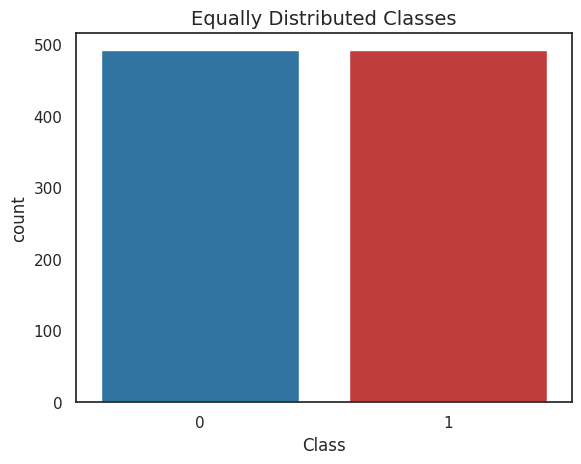

In [19]:
# Class distribution
class_dist = balanced_df['Class'].value_counts(normalize=True)
print('Distribution of the Classes in the subsample dataset')
print(class_dist)

palette = {0: '#1F77B4', 1: '#D62728'}
# Visualization (future-proof)
ax = sns.countplot(
    x='Class',
    hue='Class',
    data=balanced_df,
    palette=palette,
    legend=False
)

plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [20]:
print(class_dist.mul(100).round(2))

Class
1    50.0
0    50.0
Name: proportion, dtype: float64


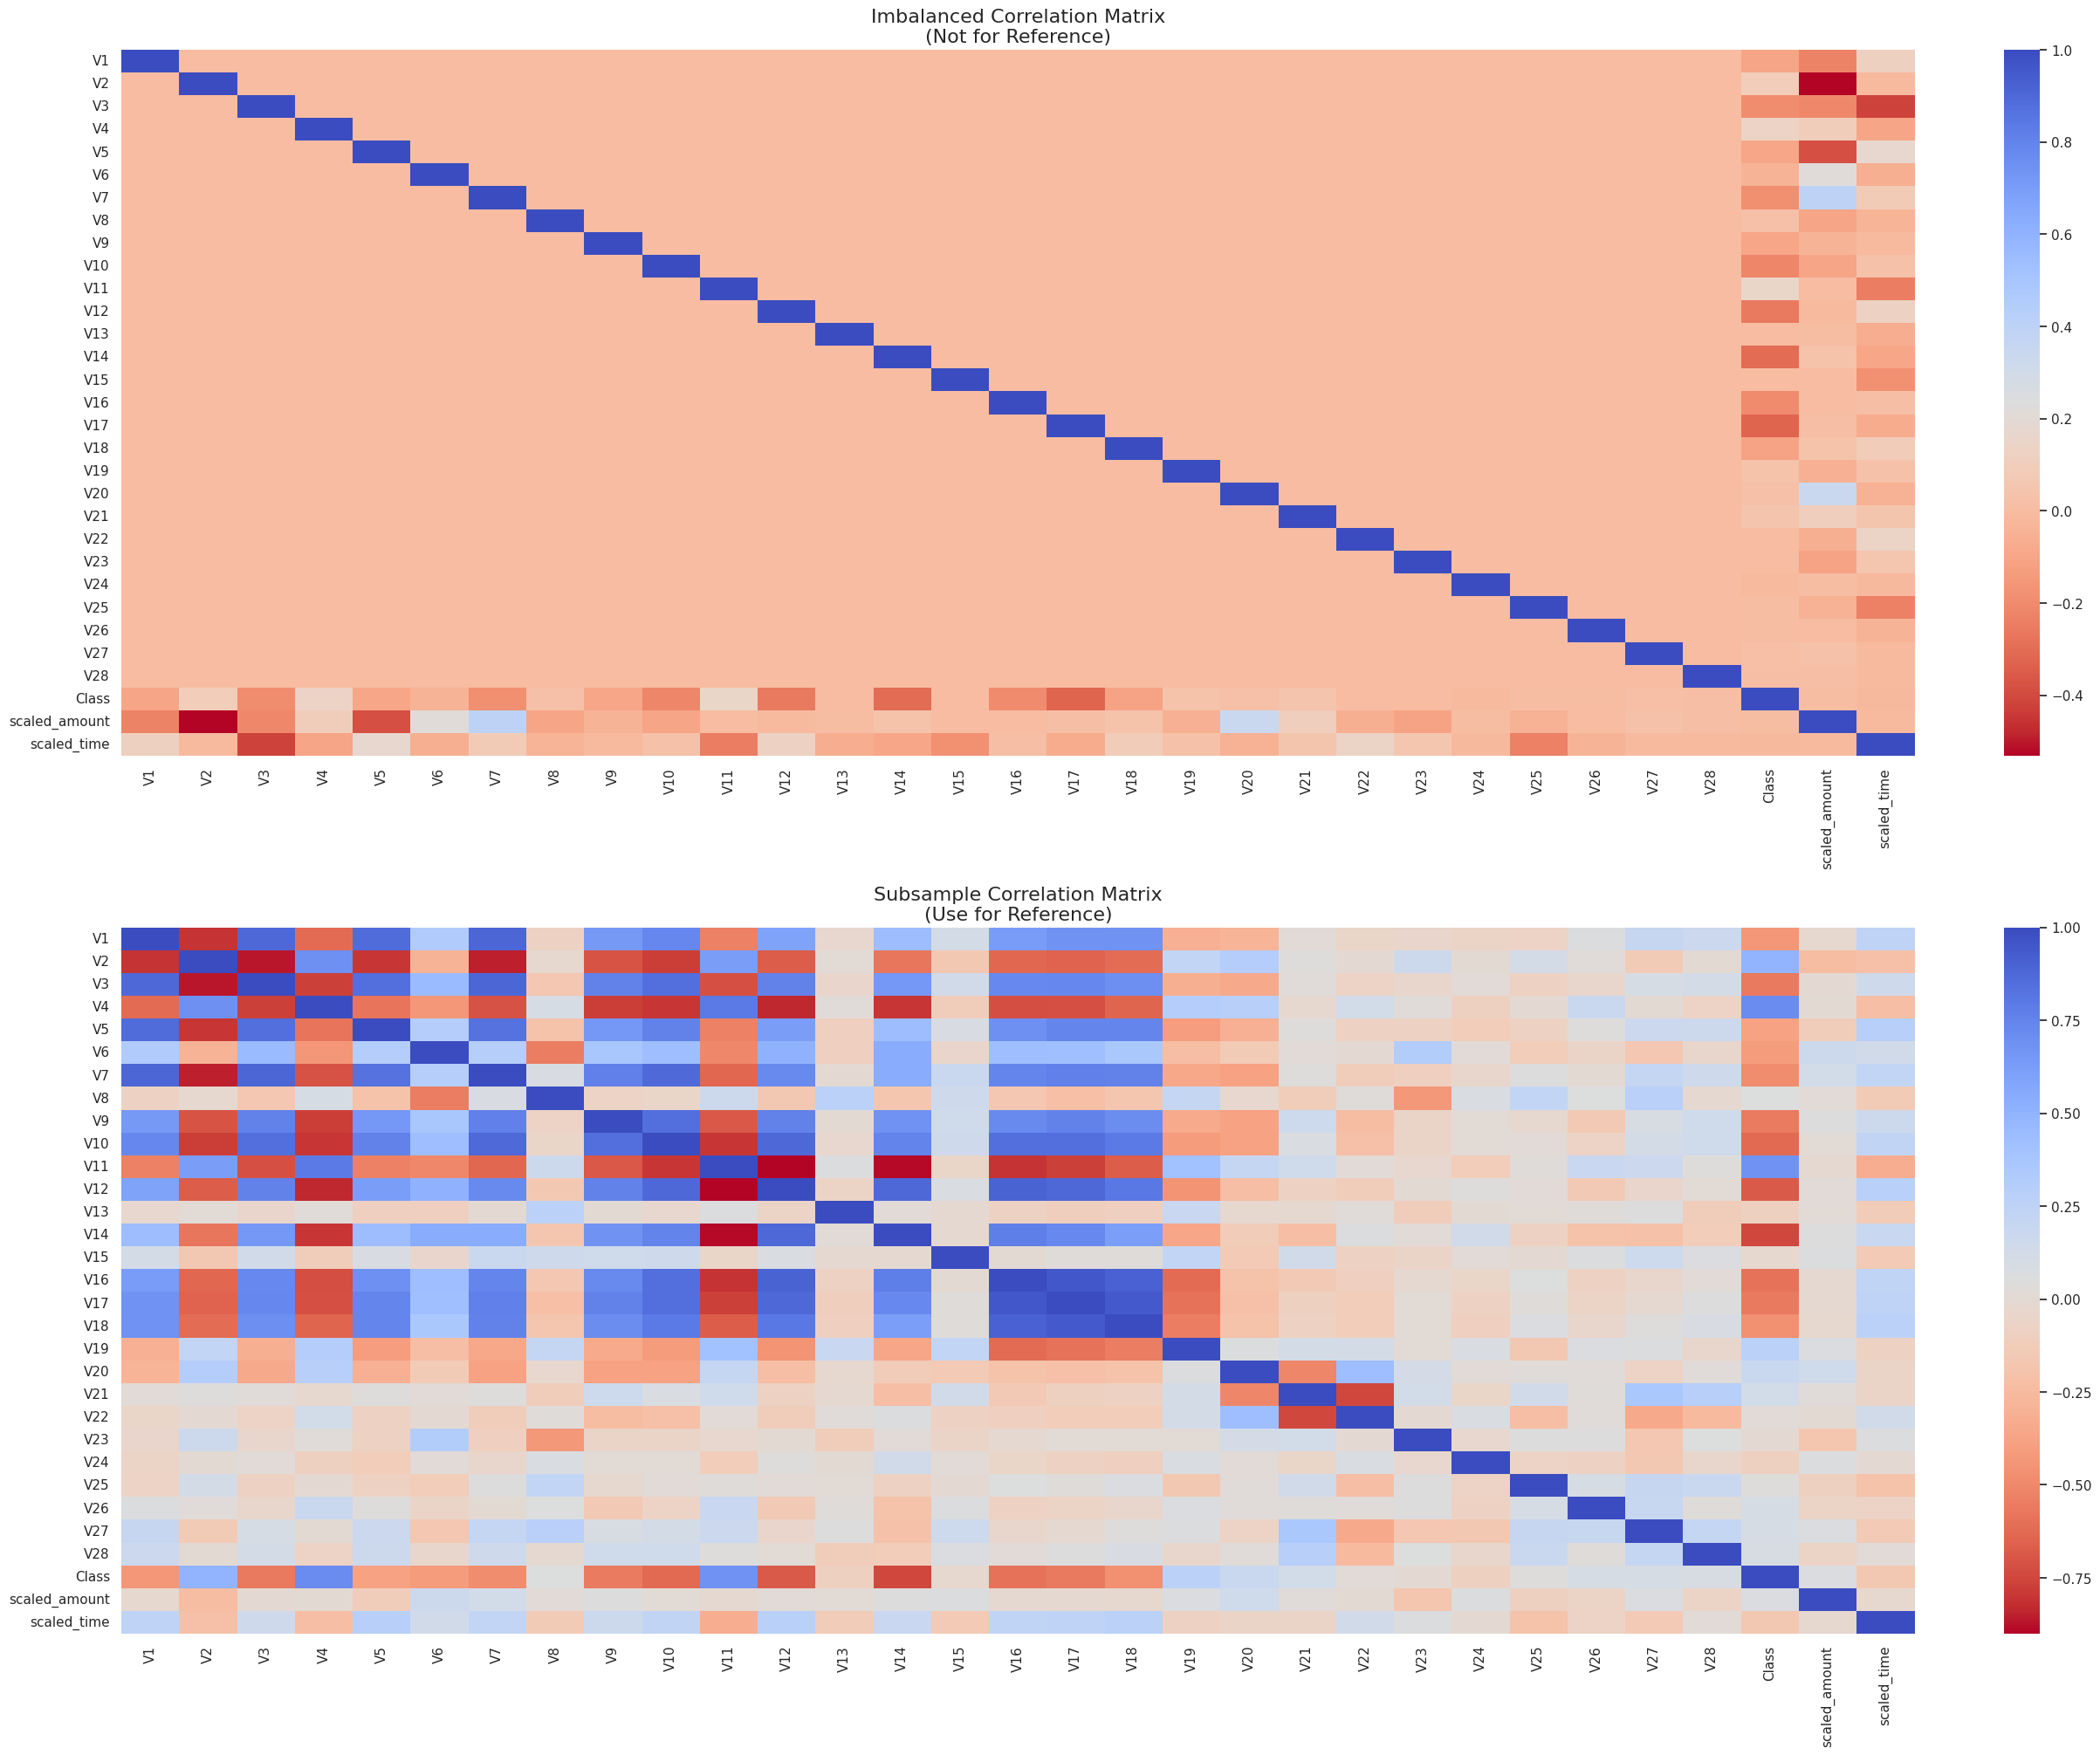

In [21]:
fig, axes = plt.subplots(nrows=2, figsize=(24, 20), constrained_layout=True)

# Correlation matrices
corr_full = df.corr(numeric_only=True)
corr_sub = balanced_df.corr(numeric_only=True)

# Full (imbalanced) dataset
sns.heatmap(
    corr_full,
    cmap='coolwarm_r',
    annot_kws={'size': 14},
    ax=axes[0]
)
axes[0].set_title(
    "Imbalanced Correlation Matrix\n(Not for Reference)",
    fontsize=16
)

# Subsampled (balanced) dataset
sns.heatmap(
    corr_sub,
    cmap='coolwarm_r',
    annot_kws={'size': 14},
    ax=axes[1]
)
axes[1].set_title(
    "Subsample Correlation Matrix\n(Use for Reference)",
    fontsize=16
)

plt.show()


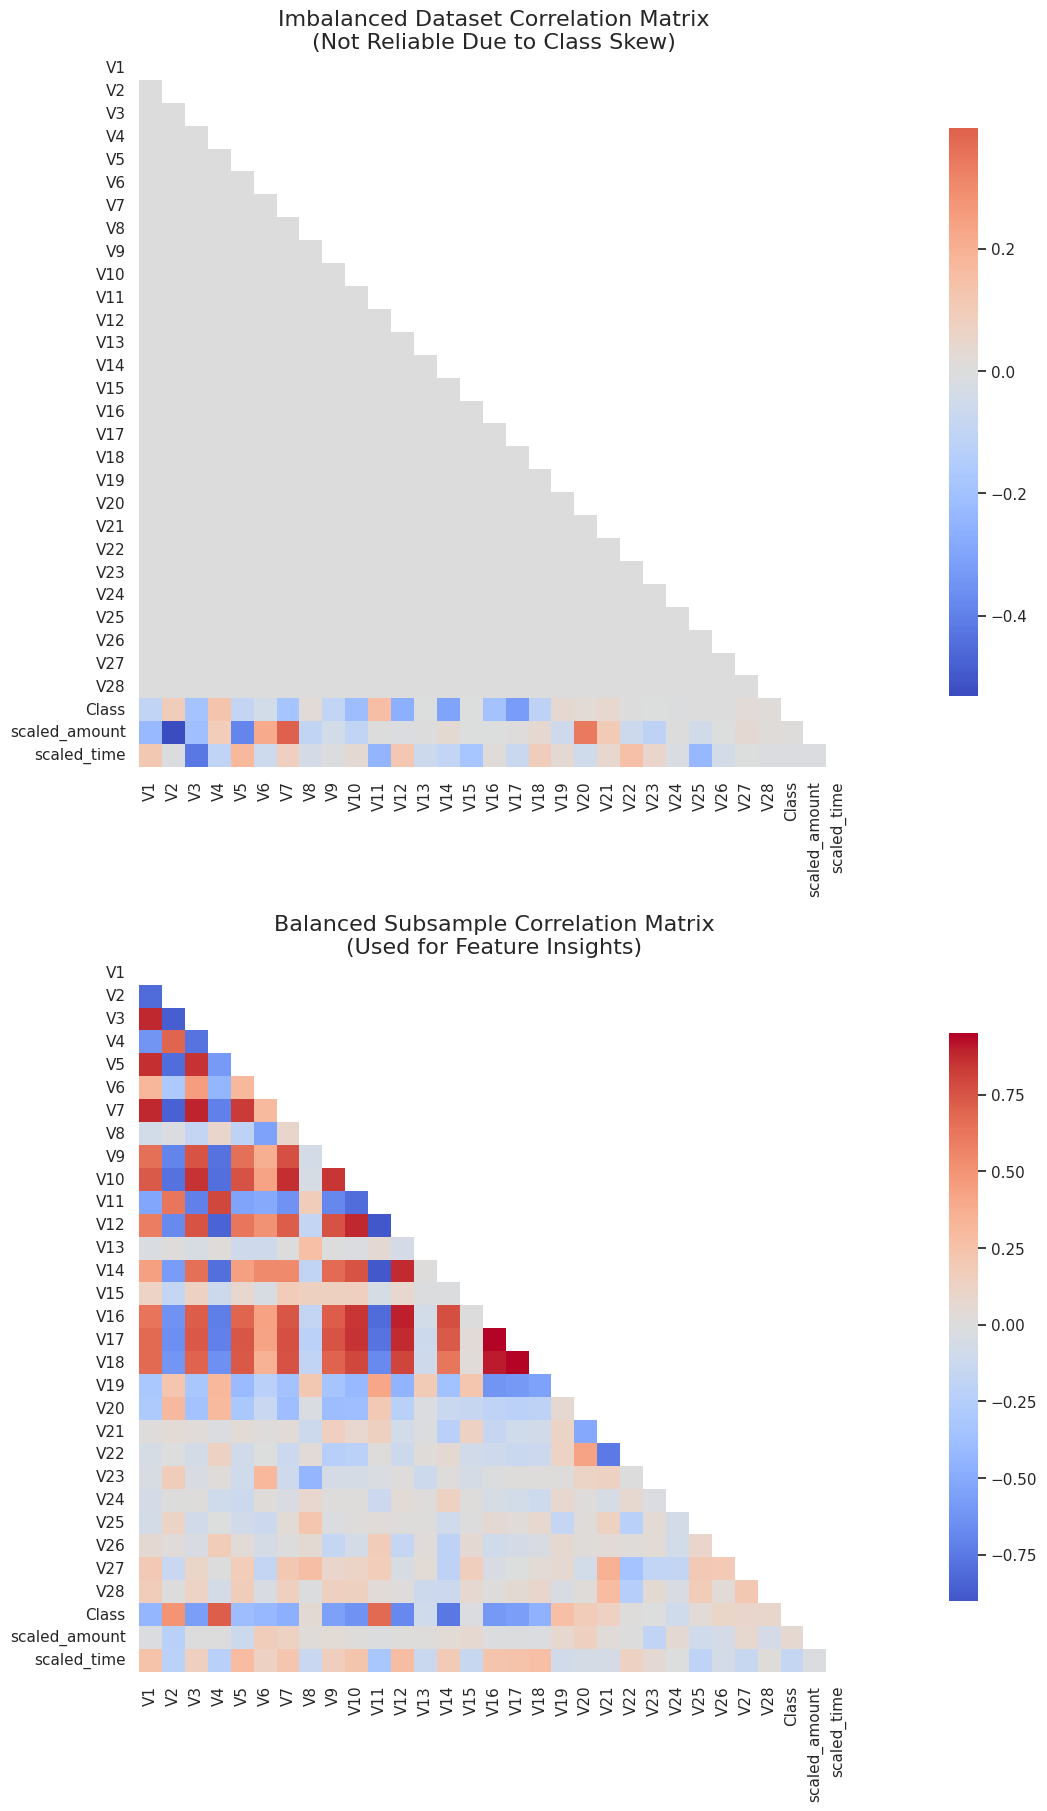

In [22]:
# Compute correlations (numeric only for safety & speed)
corr_full = df.corr(numeric_only=True)
corr_sub = balanced_df.corr(numeric_only=True)

# Mask upper triangle to reduce visual noise
mask_full = np.triu(np.ones_like(corr_full, dtype=bool))
mask_sub = np.triu(np.ones_like(corr_sub, dtype=bool))

# Plot
fig, axes = plt.subplots(
    nrows=2,
    figsize=(22, 18),
    constrained_layout=True
)

# Imbalanced dataset correlation
sns.heatmap(
    corr_full,
    mask=mask_full,
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8},
    ax=axes[0]
)
axes[0].set_title(
    "Imbalanced Dataset Correlation Matrix\n(Not Reliable Due to Class Skew)",
    fontsize=16
)

# Balanced (subsampled) dataset correlation
sns.heatmap(
    corr_sub,
    mask=mask_sub,
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8},
    ax=axes[1]
)
axes[1].set_title(
    "Balanced Subsample Correlation Matrix\n(Used for Feature Insights)",
    fontsize=16
)

plt.show()


#### focus only on correlations with Class:

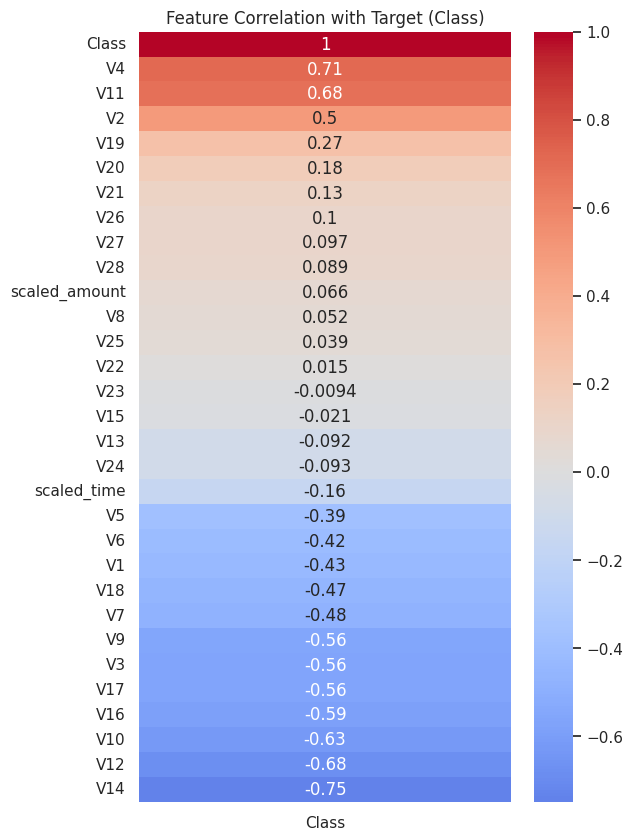

In [23]:
class_corr = corr_sub[['Class']].sort_values(by='Class', ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    class_corr,
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title("Feature Correlation with Target (Class)")
plt.show()